# Python code for computing spectral bounds for kernels computed using quantized RFFs

-H.K. Reference: https://arxiv.org/abs/2106.02614  

# Import required python scripts and packages

In [1]:
import SigDelRFF
import numpy as np
import scipy

# Set the number of data points $N$ and $\sigma$ for the RBF kernel 

In [2]:
#Set number of data points
N = 1000
N_train = 1000

#Set sigma for RBF kernel
sigma = 1

#Generate Data matrix X with shape N x 5
X,y,eps_list = SigDelRFF.GenerateData(N,5)

#Compute the RBF Kernel
K = SigDelRFF.RBFkernel(sigma,X,N_train)  

# Set the number of features $m$ and compute the random Fourier features

In [3]:
#Set the number of features m
m = 600

#Compute RFF features and RFF kernel
Z = SigDelRFF.RFF_for_RBF(sigma,X,m,N_train,5)
K_RFF = (2/m)*np.matmul(Z,Z.transpose())

# Set the condensation dimension $p$, perform $\Sigma\Delta$ and compute approximate kernel

In [4]:
lambd = 15
p = int(m/15)
sig = 6

DFT = scipy.linalg.dft(lambd)
v1 = DFT[0]
v1 = v1.real

In [5]:
#Perform Sigma-Delta quantization to the features
Q,U = SigDelRFF.SigDel(Z,1,sig)

#Apply condensation operator
Z_tilde = SigDelRFF.Condense(Q,1,p,lambd,v1)

#Compute approximate kernel given by Condensed + Sigma-Delta quantization
K_tilde = np.matmul(Z_tilde,Z_tilde.transpose())

# Perform stochastic quantization of the features

In [6]:
import math

Q_stoc = np.empty((N_train,m))

#Perform Stochastic quantization
SigDelRFF.StocQuant(Q_stoc,Z,m,N_train)

#Compute approximate kernel given by stochastic quantization
K_stoc = (2/m)*np.matmul(Q_stoc,Q_stoc.transpose())

# Set regularization parameter $\mu$ and compute spectral bounds

In [7]:
print("*******************************************")
print("Frobenius norm of K - K_RFF is "+ str(np.linalg.norm(K-K_RFF, 'fro')))
print("*******************************************")
print("Frobenius norm of K - K_stoc is " + str(np.linalg.norm(K-K_stoc, 'fro')))
print("*******************************************")
print("Frobenius norm of K - K_tilde is " + str(np.linalg.norm(K-K_tilde, 'fro')))
print("*******************************************")

*******************************************
Frobenius norm of K - K_RFF is 35.508526241556645
*******************************************
Frobenius norm of K - K_stoc is 85.13136254379684
*******************************************
Frobenius norm of K - K_tilde is 159.14673867734163
*******************************************


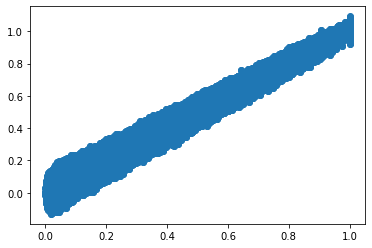

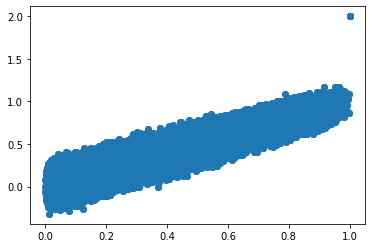

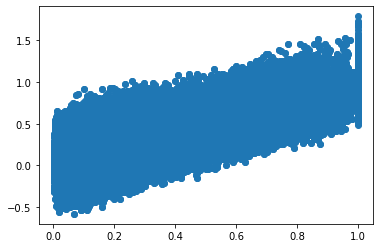

In [8]:
import matplotlib.pylab as plt
plt.figure(1)
plt.scatter(K.flatten(),K_RFF.flatten())
plt.figure(2)
plt.scatter(K.flatten(),K_stoc.flatten())
plt.figure(3)
plt.scatter(K.flatten(),K_tilde.flatten())
plt.show()

In [9]:
mu = 1

Delta_1,Delta_2 = SigDelRFF.SpectralBounds(K,K_RFF,mu)
print("*******************************************")
print("Delta_1 and Delta_2 for K_RFF")   
print(str(Delta_1) + "\t" + str(Delta_2))        
print("*******************************************")
SigDelRFF.checkBounds(Delta_1,Delta_2,K,K_RFF,mu)

#Compute spectral bounds for regularized K_stoc
Delta_1,Delta_2 = SigDelRFF.SpectralBounds(K,K_stoc,mu)
print("Delta_1 and Delta_2 for K_stoc")      
print(str(Delta_1) + "\t" + str(Delta_2))        
print("*******************************************")
SigDelRFF.checkBounds(Delta_1,Delta_2,K,K_stoc,mu)

#Compute spectral bounds for regularized K_tilde
Delta_1,Delta_2 = SigDelRFF.SpectralBounds(K,K_tilde,mu)
print("Delta_1 and Delta_2 for K_tilde")     
print(str(Delta_1) + "\t" + str(Delta_2))        
print("*******************************************")
SigDelRFF.checkBounds(Delta_1,Delta_2,K,K_tilde,mu)

*******************************************
Delta_1 and Delta_2 for K_RFF
0.5531077014608565	1.0839952024104655
*******************************************
Delta_1 and Delta_2 for K_stoc
0.7234560472887948	5.219150944297129
*******************************************
Delta_1 and Delta_2 for K_tilde
0.951298184251328	7.353627943971013
*******************************************


# Loop thorugh different values for number of features and plot results

In [10]:
import SigDelRFF
import numpy as np
import scipy

#Set number of data points
N = 1000
N_train = 1000

#Set sigma for RBF kernel
sigma = 1

#Generate Data matrix X with shape N x 5
X,y,eps_list = SigDelRFF.GenerateData(N,5)

#Compute the RBF Kernel
K = SigDelRFF.RBFkernel(sigma,X,N_train)  

In [11]:
lambd = 15
m = []
for i in range(0,7):
    m.append(150+i*150)

m = np.asarray(m,dtype=int)

K_RFFList = np.empty((m.size,N_train,N_train))
K_stocList = np.empty((m.size,N_train,N_train))
K_tildeList1 = np.empty((m.size,N_train,N_train))
K_tildeList2 = np.empty((m.size,N_train,N_train))

print(m)

[ 150  300  450  600  750  900 1050]


In [12]:
#Set v for condensation in r=1 case
DFT = scipy.linalg.dft(lambd)
vR1 = DFT[0]
vR1 = vR1.real

#Set v for condensation in r=2 case
r = 2
vR2 = np.empty(lambd)
lambd_tilde = int((lambd+r-1)/r)
for i in range(0,lambd_tilde):
    vR2[i] = i+1
k = 1    
for i in range(lambd_tilde,lambd):
    vR2[i] =  lambd_tilde - k
    k = k+1

#Peform quantization for various feature lenghts
for iterr in range(m.size):
    print(m[iterr])
    p = int(m[iterr]/lambd)
    
    #Compute RFF features and RFF kernel
    Z = SigDelRFF.RFF_for_RBF(sigma,X,m[iterr],N_train,5)
    K_RFFList[iterr] = (2/m[iterr])*np.matmul(Z,Z.transpose())
    
    #Perform Stochastic quantization
    Q_stoc = np.empty((N_train,m[iterr]))
    SigDelRFF.StocQuant(Q_stoc,Z,m[iterr],N_train)
    K_stocList[iterr] = (2/m[iterr])*np.matmul(Q_stoc,Q_stoc.transpose())    
    
    #Perform Sigma-Delta quantization to the features for r=1
    Q,U = SigDelRFF.SigDel(Z,1,6)
    Z_tilde1 = SigDelRFF.Condense(Q,1,p,lambd,vR1)
    K_tildeList1[iterr] = np.matmul(Z_tilde1,Z_tilde1.transpose())
    
    #Perform Sigma-Delta quantization to the features for r=2, sigma=6
    Q,U = SigDelRFF.SigDel(Z,2,6)
    Z_tilde2 = SigDelRFF.Condense(Q,2,p,lambd,vR2)
    K_tildeList2[iterr] = np.matmul(Z_tilde2,Z_tilde2.transpose())  


150
300
450
600
750
900
1050


In [13]:
mu = 1

D1_RFFlist = []
D2_RFFlist = []

D1_Stoclist = []
D2_Stoclist = []

D1_SigDellist1 = []
D2_SigDellist1 = []

D1_SigDellist2 = []
D2_SigDellist2 = []

for iterr in range(m.size):
    print(m[iterr])
    
    #Compute spectral bounds for regularized K_RFF
    Delta_1,Delta_2 = SigDelRFF.CleanSpectralBounds(K,K_RFFList[iterr],mu)
    D1_RFFlist.append(Delta_1)
    D2_RFFlist.append(Delta_2)   
    
    #Compute spectral bounds for regularized K_stoc
    Delta_1,Delta_2 = SigDelRFF.CleanSpectralBounds(K,K_stocList[iterr],mu)
    D1_Stoclist.append(Delta_1)
    D2_Stoclist.append(Delta_2)     

    #Compute spectral bounds for regularized K_tilde1
    Delta_1,Delta_2 = SigDelRFF.CleanSpectralBounds(K,K_tildeList1[iterr],mu)
    D1_SigDellist1.append(Delta_1)
    D2_SigDellist1.append(Delta_2)
    
    #Compute spectral bounds for regularized K_tilde2
    Delta_1,Delta_2 = SigDelRFF.CleanSpectralBounds(K,K_tildeList2[iterr],mu)
    D1_SigDellist2.append(Delta_1)
    D2_SigDellist2.append(Delta_2)
    

150
300
450
600
750
900
1050


Text(0.5, 1.0, '$\\Delta_2$ v.s. m for regularization $\\mu = $1')

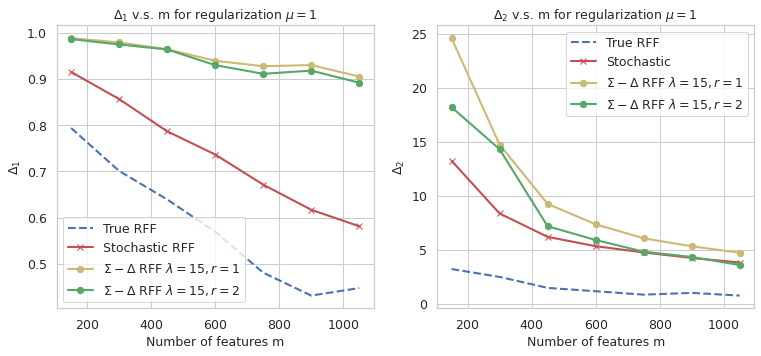

In [14]:
import matplotlib.pylab as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
small_size = 12
medium_size = 12
big_size = 14

plt.rcParams["figure.figsize"] = [12,5]
plt.rcParams["figure.dpi"] = 75
plt.rc('font', size=small_size)          
plt.rc('axes', titlesize=small_size)    
plt.rc('axes', labelsize=medium_size)    
plt.rc('xtick', labelsize=small_size)    
plt.rc('ytick', labelsize=small_size)    
plt.rc('legend', fontsize=small_size)    
plt.rc('figure', titlesize=big_size) 

fig,(ax1,ax2) = plt.subplots(1,2)

ax1.plot(m,D1_RFFlist,'--b',m,D1_Stoclist,'-xr',m,D1_SigDellist1,'-oy',m,D1_SigDellist2,'-og', linewidth=2, markersize=6)
ax1.set_xlabel("Number of features m")
ax1.set_ylabel("$\Delta_1$")
ax1.legend(['True RFF','Stochastic RFF','$\Sigma-\Delta$ RFF $\lambda=15, r=1$','$\Sigma-\Delta$ RFF $\lambda=15, r=2$'])
ax1.set_title("$\Delta_1$ v.s. m for regularization $\mu = $" + str(mu))

ax2.plot(m,D2_RFFlist,'--b',m,D2_Stoclist,'-xr',m,D2_SigDellist1,'-oy',m,D2_SigDellist2,'-og', linewidth=2, markersize=6)
ax2.set_xlabel("Number of features m")
ax2.set_ylabel("$\Delta_2$")
ax2.legend(['True RFF','Stochastic','$\Sigma-\Delta$ RFF $\lambda=15, r=1$','$\Sigma-\Delta$ RFF $\lambda=15, r=2$'])
ax2.set_title("$\Delta_2$ v.s. m for regularization $\mu = $" + str(mu))

#fig.savefig("Images/mu_" + str(mu) + ".png",bbox_inches="tight", dpi=200)

Text(0.5, 1.0, '$\\Delta_2$ v.s. m for regularization $\\mu = $1')

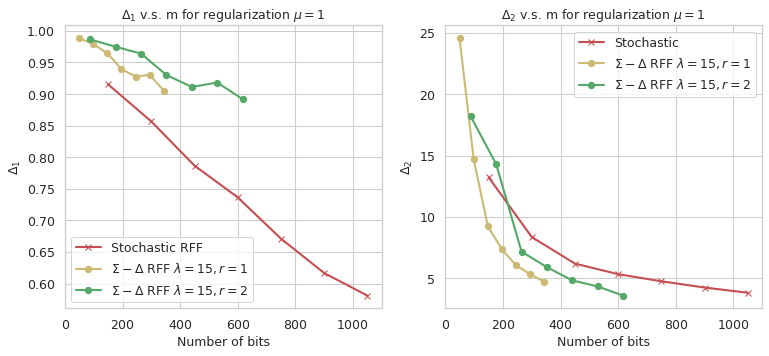

In [15]:
Stoc_bits = []
SigDel_bits1 = []
SigDel_bits2 = []
for i in range(0,m.size):
    Stoc_bits.append(m[i])
    p = int(m[i]/lambd)
    SigDel_bits1.append(p*(1+np.log2(lambd)))
    SigDel_bits2.append(p*(1+2*np.log2(lambd)))
    
fig, (ax1,ax2) = plt.subplots(1,2)

ax1.plot(Stoc_bits,D1_Stoclist,'-xr',SigDel_bits1,D1_SigDellist1,'-oy',SigDel_bits2,D1_SigDellist2,'-og',linewidth=2, markersize=6)
ax1.set_xlabel("Number of bits")
ax1.set_ylabel("$\Delta_1$")
ax1.legend(['Stochastic RFF','$\Sigma-\Delta$ RFF $\lambda=15, r=1$','$\Sigma-\Delta$ RFF $\lambda=15, r=2$'])
ax1.set_title("$\Delta_1$ v.s. m for regularization $\mu = $" + str(mu))

ax2.plot(Stoc_bits,D2_Stoclist,'-xr',SigDel_bits1,D2_SigDellist1,'-oy',SigDel_bits2,D2_SigDellist2,'-og',linewidth=2, markersize=6)
ax2.set_xlabel("Number of bits")
ax2.set_ylabel("$\Delta_2$")
ax2.legend(['Stochastic','$\Sigma-\Delta$ RFF $\lambda=15, r=1$','$\Sigma-\Delta$ RFF $\lambda=15, r=2$'])
ax2.set_title("$\Delta_2$ v.s. m for regularization $\mu = $" + str(mu))

#fig.savefig("Images/bitsmu_"+ str(mu) + ".png", bbox_inches="tight", dpi=200)

Text(0.5, 1.0, 'Relative Frobenius norm of error matrix')

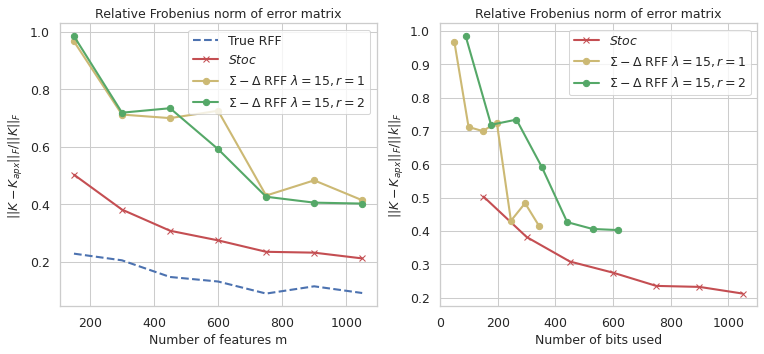

In [16]:
Stoc_bits = []
SigDel_bits1 = []
SigDel_bits2 = []
for i in range(0,m.size):
    Stoc_bits.append(m[i])
    p = int(m[i]/lambd)
    SigDel_bits1.append(p*(1+np.log2(lambd)))
    SigDel_bits2.append(p*(1+2*np.log2(lambd)))

FElist_rff = []
FElist_stoc = []
FElist_sigdel1 = []
FElist_sigdel2 = []

True_frob = np.linalg.norm(K, 'fro')
for iterr in range(m.size):
    FElist_rff.append(np.linalg.norm(K-K_RFFList[iterr], 'fro'))
    FElist_stoc.append(np.linalg.norm(K-K_stocList[iterr], 'fro'))
    FElist_sigdel1.append(np.linalg.norm(K-K_tildeList1[iterr], 'fro'))
    FElist_sigdel2.append(np.linalg.norm(K-K_tildeList2[iterr], 'fro'))

fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(m,FElist_rff/True_frob,'--b',m,FElist_stoc/True_frob,'-xr',m,FElist_sigdel1/True_frob,'-oy',m,FElist_sigdel2/True_frob,'-og',
         linewidth=2, markersize=6)
ax1.set_xlabel("Number of features m")
ax1.set_ylabel("$\||K - K_{apx}\||_F/\||K\||_F$")
ax1.legend(['True RFF','$Stoc$','$\Sigma-\Delta$ RFF $\lambda=15, r=1$','$\Sigma-\Delta$ RFF $\lambda=15, r=2$'])
ax1.set_title("Relative Frobenius norm of error matrix")

ax2.plot(Stoc_bits,FElist_stoc/True_frob,'-xr',SigDel_bits1,FElist_sigdel1/True_frob,'-oy',SigDel_bits2,FElist_sigdel2/True_frob,'-og',
         linewidth=2, markersize=6)
ax2.set_xlabel("Number of bits used")
ax2.set_ylabel("$\||K - K_{apx}\||_F/\||k \||_F$")
ax2.legend(['$Stoc$','$\Sigma-\Delta$ RFF $\lambda=15, r=1$','$\Sigma-\Delta$ RFF $\lambda=15, r=2$'])
ax2.set_title("Relative Frobenius norm of error matrix")

#fig.savefig("Images/FrobNorm.png",bbox_inches="tight", dpi=200)


Text(0.5, 1.0, 'Relative operator norm of error matrix')

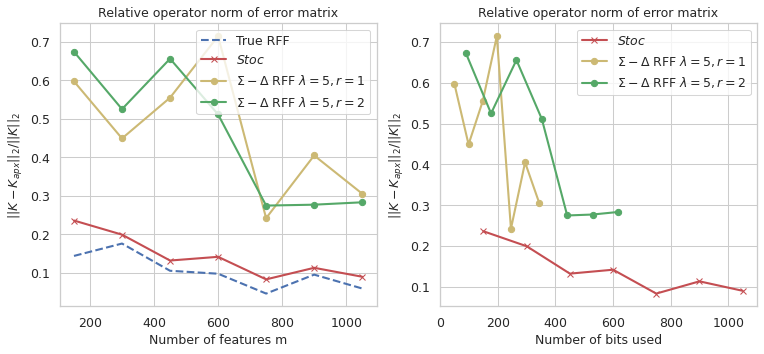

In [17]:
Stoc_bits = []
SigDel_bits1 = []
SigDel_bits2 = []
for i in range(0,m.size):
    Stoc_bits.append(m[i])
    p = int(m[i]/lambd)
    SigDel_bits1.append(p*(1+np.log2(lambd)))
    SigDel_bits2.append(p*(1+2*np.log2(lambd)))

FElist_rff = []
FElist_stoc = []
FElist_sigdel1 = []
FElist_sigdel2 = []

True_norm = np.linalg.norm(K, 2)
for iterr in range(m.size):
    FElist_rff.append(np.linalg.norm(K-K_RFFList[iterr], 2))
    FElist_stoc.append(np.linalg.norm(K-K_stocList[iterr], 2))
    FElist_sigdel1.append(np.linalg.norm(K-K_tildeList1[iterr], 2))
    FElist_sigdel2.append(np.linalg.norm(K-K_tildeList2[iterr], 2))

fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(m,FElist_rff/True_norm,'--b',m,FElist_stoc/True_norm,'-xr',m,FElist_sigdel1/True_norm,'-oy',m,FElist_sigdel2/True_norm,'-og',
         linewidth=2, markersize=6)
ax1.set_xlabel("Number of features m")
ax1.set_ylabel("$\||K - K_{apx}\||_2/\||K\||_2$")
ax1.legend(['True RFF','$Stoc$','$\Sigma-\Delta$ RFF $\lambda=5, r=1$','$\Sigma-\Delta$ RFF $\lambda=5, r=2$'])
ax1.set_title("Relative operator norm of error matrix")

ax2.plot(Stoc_bits,FElist_stoc/True_norm,'-xr',SigDel_bits1,FElist_sigdel1/True_norm,'-oy',SigDel_bits2,FElist_sigdel2/True_norm,'-og',
         linewidth=2, markersize=6)
ax2.set_xlabel("Number of bits used")
ax2.set_ylabel("$\||K - K_{apx}\||_2/\||K \||_2$")
ax2.legend(['$Stoc$','$\Sigma-\Delta$ RFF $\lambda=5, r=1$','$\Sigma-\Delta$ RFF $\lambda=5, r=2$'])
ax2.set_title("Relative operator norm of error matrix")

#fig.savefig("Images/OperatorNorm.png",facecolor="w",bbox_inches="tight", dpi=200)


Text(0.5, 1.0, '$\\sigma_{1000}(K-K_{apx})/\\sigma_{1000}(K)$ v.s. m')

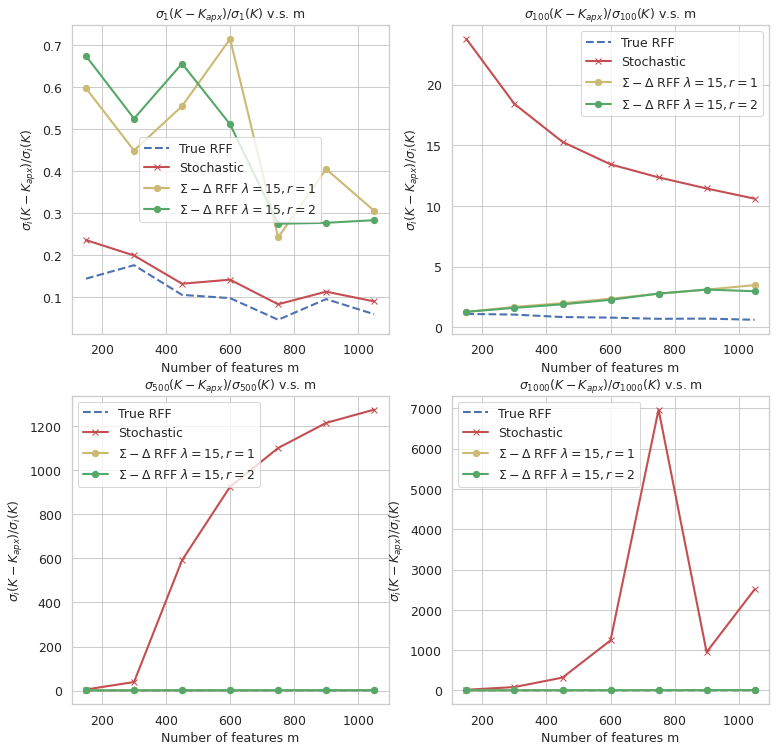

In [18]:
import scipy
plt.rcParams["figure.figsize"] = [12,12]

FElist_rff = []
FElist_stoc = []
FElist_sigdel1 = []
FElist_sigdel2 = []

indx = 0
for iterr in range(m.size):
    true_sv = scipy.linalg.svdvals(K)
    err_sv = scipy.linalg.svdvals(K-K_RFFList[iterr])
    Rel_op_error = err_sv[indx]/true_sv[indx]
    FElist_rff.append(Rel_op_error)
    
    err_sv = scipy.linalg.svdvals(K-K_stocList[iterr])
    Rel_op_error = err_sv[indx]/true_sv[indx]
    FElist_stoc.append(Rel_op_error)

    err_sv = scipy.linalg.svdvals(K-K_tildeList1[iterr])
    Rel_op_error = err_sv[indx]/true_sv[indx]
    FElist_sigdel1.append(Rel_op_error)
    
    err_sv = scipy.linalg.svdvals(K-K_tildeList2[iterr])
    Rel_op_error = err_sv[indx]/true_sv[indx]
    FElist_sigdel2.append(Rel_op_error)

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.plot(m,FElist_rff,'--b',m,FElist_stoc,'-xr',m,FElist_sigdel1,'-oy',m,FElist_sigdel2,'-og', linewidth=2, markersize=6)    
ax1.set_xlabel("Number of features m")
ax1.set_ylabel("$\sigma_i(K-K_{apx})/\sigma_i(K)$")
ax1.legend(['True RFF','Stochastic','$\Sigma-\Delta$ RFF $\lambda=15, r=1$','$\Sigma-\Delta$ RFF $\lambda=15, r=2$'])
ax1.set_title("$\sigma_1(K-K_{apx})/\sigma_1(K)$ v.s. m")

FElist_rff = []
FElist_stoc = []
FElist_sigdel1 = []
FElist_sigdel2 = []

indx = 99
for iterr in range(m.size):
    true_sv = scipy.linalg.svdvals(K)
    err_sv = scipy.linalg.svdvals(K-K_RFFList[iterr])
    Rel_op_error = err_sv[indx]/true_sv[indx]
    FElist_rff.append(Rel_op_error)
    
    err_sv = scipy.linalg.svdvals(K-K_stocList[iterr])
    Rel_op_error = err_sv[indx]/true_sv[indx]
    FElist_stoc.append(Rel_op_error)

    err_sv = scipy.linalg.svdvals(K-K_tildeList1[iterr])
    Rel_op_error = err_sv[indx]/true_sv[indx]
    FElist_sigdel1.append(Rel_op_error)
    
    err_sv = scipy.linalg.svdvals(K-K_tildeList2[iterr])
    Rel_op_error = err_sv[indx]/true_sv[indx]
    FElist_sigdel2.append(Rel_op_error)
    
ax2.plot(m,FElist_rff,'--b',m,FElist_stoc,'-xr',m,FElist_sigdel1,'-oy',m,FElist_sigdel2,'-og', linewidth=2, markersize=6)    
ax2.set_xlabel("Number of features m")
ax2.set_ylabel("$\sigma_i(K-K_{apx})/\sigma_i(K)$")
ax2.legend(['True RFF','Stochastic','$\Sigma-\Delta$ RFF $\lambda=15, r=1$','$\Sigma-\Delta$ RFF $\lambda=15, r=2$'])
ax2.set_title("$\sigma_{100}(K-K_{apx})/\sigma_{100}(K)$ v.s. m")

FElist_rff = []
FElist_stoc = []
FElist_sigdel1 = []
FElist_sigdel2 = []

indx = 499
for iterr in range(m.size):
    true_sv = scipy.linalg.svdvals(K)
    err_sv = scipy.linalg.svdvals(K-K_RFFList[iterr])
    Rel_op_error = err_sv[indx]/true_sv[indx]
    FElist_rff.append(Rel_op_error)
    
    err_sv = scipy.linalg.svdvals(K-K_stocList[iterr])
    Rel_op_error = err_sv[indx]/true_sv[indx]
    FElist_stoc.append(Rel_op_error)

    err_sv = scipy.linalg.svdvals(K-K_tildeList1[iterr])
    Rel_op_error = err_sv[indx]/true_sv[indx]
    FElist_sigdel1.append(Rel_op_error)
    
    err_sv = scipy.linalg.svdvals(K-K_tildeList2[iterr])
    Rel_op_error = err_sv[indx]/true_sv[indx]
    FElist_sigdel2.append(Rel_op_error)

ax3.plot(m,FElist_rff,'--b',m,FElist_stoc,'-xr',m,FElist_sigdel1,'-oy',m,FElist_sigdel2,'-og', linewidth=2, markersize=6)    
ax3.set_xlabel("Number of features m")
ax3.set_ylabel("$\sigma_i(K-K_{apx})/\sigma_i(K)$")
ax3.legend(['True RFF','Stochastic','$\Sigma-\Delta$ RFF $\lambda=15, r=1$','$\Sigma-\Delta$ RFF $\lambda=15, r=2$'])
ax3.set_title("$\sigma_{500}(K-K_{apx})/\sigma_{500}(K)$ v.s. m")

FElist_rff = []
FElist_stoc = []
FElist_sigdel1 = []
FElist_sigdel2 = []

indx = 999
for iterr in range(m.size):
    true_sv = scipy.linalg.svdvals(K)
    err_sv = scipy.linalg.svdvals(K-K_RFFList[iterr])
    Rel_op_error = err_sv[indx]/true_sv[indx]
    FElist_rff.append(Rel_op_error)
    
    err_sv = scipy.linalg.svdvals(K-K_stocList[iterr])
    Rel_op_error = err_sv[indx]/true_sv[indx]
    FElist_stoc.append(Rel_op_error)

    err_sv = scipy.linalg.svdvals(K-K_tildeList1[iterr])
    Rel_op_error = err_sv[indx]/true_sv[indx]
    FElist_sigdel1.append(Rel_op_error)
    
    err_sv = scipy.linalg.svdvals(K-K_tildeList2[iterr])
    Rel_op_error = err_sv[indx]/true_sv[indx]
    FElist_sigdel2.append(Rel_op_error)
    
ax4.plot(m,FElist_rff,'--b',m,FElist_stoc,'-xr',m,FElist_sigdel1,'-oy',m,FElist_sigdel2,'-og', linewidth=2, markersize=6)    
ax4.set_xlabel("Number of features m")
ax4.set_ylabel("$\sigma_i(K-K_{apx})/\sigma_i(K)$")
ax4.legend(['True RFF','Stochastic','$\Sigma-\Delta$ RFF $\lambda=15, r=1$','$\Sigma-\Delta$ RFF $\lambda=15, r=2$'])
ax4.set_title("$\sigma_{1000}(K-K_{apx})/\sigma_{1000}(K)$ v.s. m")
    
#fig.savefig("Images/SingVals.png", bbox_inches="tight", dpi=200)